<a href="https://colab.research.google.com/github/remre/StriveSchool-ai/blob/main/week5featureeng/d2Titanic/TitanicComp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import seaborn  as sb
import matplotlib.pyplot as plt
import sklearn  as skl
import missingno as m

from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config 

set_config(display='diagram') # Useful for display the pipeline !pip install --upgrade scikit-learn

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__)

Pandas   1.1.5
Sklearn  1.0.1


In [2]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = ("/content")

In [ ]:
!kaggle competitions download -c titanic

In [4]:
df = pd.read_csv("train.csv",index_col='PassengerId')
df_test = pd.read_csv("test.csv",  index_col='PassengerId')
df_genders = pd.read_csv("gender_submission.csv")
print("Train DataFrame:", df.shape)
print("Test DataFrame: ", df_test.shape)


Train DataFrame: (891, 11)
Test DataFrame:  (418, 10)


In [5]:
df_genders.iloc[:,1] # i think this is y(target variable for the test dataframe) no!! it is gender discrimination

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [6]:
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
df_test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

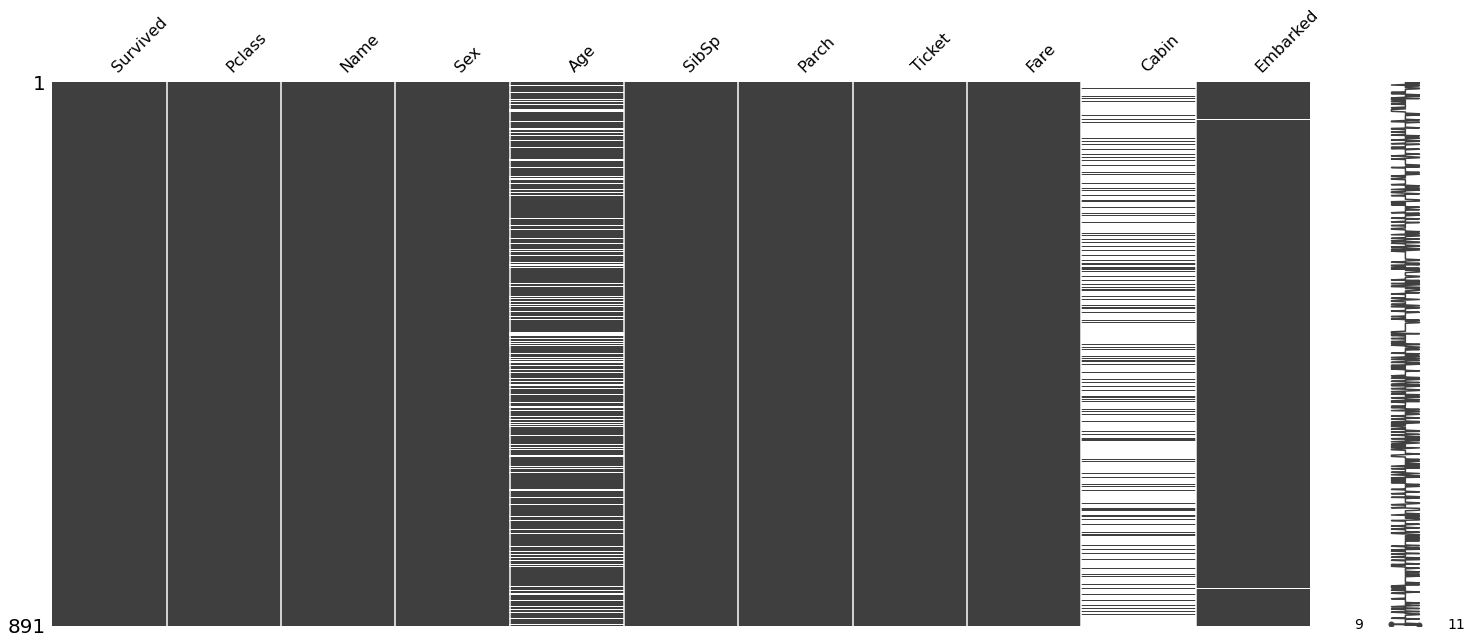

In [ ]:
m.matrix(df)

In [ ]:
m.heatmap(df)

In [ ]:
m.bar(df_test)

In [10]:
get_title = (lambda x: x.split(",")[1].strip().split(".")[0].strip())
df["Title"] = df["Name"].map(get_title)
df_test["Title"] = df_test["Name"].map(get_title)

In [11]:
df["Title"]

PassengerId
1        Mr
2       Mrs
3      Miss
4       Mrs
5        Mr
       ... 
887     Rev
888    Miss
889    Miss
890      Mr
891      Mr
Name: Title, Length: 891, dtype: object

In [12]:
title_dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [13]:
df["Title"] = df["Title"].map(title_dictionary)
df_test["Title"] = df_test["Title"].map(title_dictionary)

In [14]:
df_test["Title"].sample(n=15)

PassengerId
1265        Mr
974         Mr
985         Mr
1292      Miss
910       Miss
1213        Mr
1191        Mr
1076       Mrs
914        Mrs
1167      Miss
1209        Mr
1271    Master
1172      Miss
1293        Mr
946         Mr
Name: Title, dtype: object

In [15]:
df_test['Ticket']#worthless dont waste yoru time

PassengerId
892                 330911
893                 363272
894                 240276
895                 315154
896                3101298
               ...        
1305             A.5. 3236
1306              PC 17758
1307    SOTON/O.Q. 3101262
1308                359309
1309                  2668
Name: Ticket, Length: 418, dtype: object

In [16]:
df_test["Cabin"].sample(n=20) #most of them are missing

PassengerId
1119      NaN
897       NaN
1123      NaN
1029      NaN
1008      NaN
1095      NaN
1180    F E46
906       E31
1124      NaN
1295      NaN
1053      NaN
1289      B41
1088      E34
1246      NaN
1285      NaN
1102      NaN
1038      E46
964       NaN
1253      NaN
1258      NaN
Name: Cabin, dtype: object

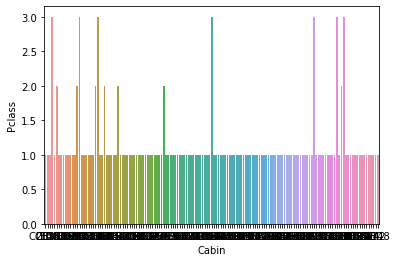

In [17]:
import seaborn as sns
sns.barplot(x='Cabin', y='Pclass', data=df)#it is obvious that Pclass 1 has most of cabins

In [18]:
df["Cabin"] = df["Cabin"].apply(lambda x: 1 if x is True else 0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,Officer
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,0,S,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,0,S,Miss


In [19]:
df["AloneOrNot"] = (df["SibSp"] + df["Parch"]).apply(lambda x: 1 if x>0 else 0)
df["AloneOrNot"].unique()

array([1, 0])

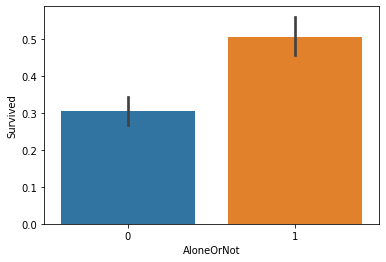

In [20]:
sns.barplot(x='AloneOrNot', y='Survived', data=df)#it can be clearly seen that if u came Titanic Alone u will Die Alone

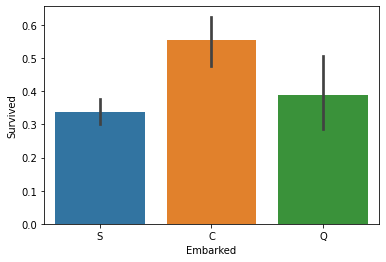

In [21]:
sns.barplot(x='Embarked', y='Survived', data=df) # it is hard to interfere atm maybe should consider with combination of class fare or age

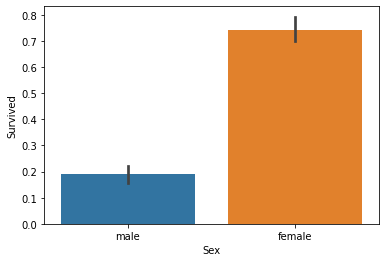

In [22]:

sns.barplot(x='Sex', y='Survived', data=df)#looks like a benevolent sexism

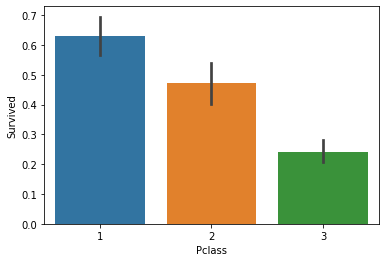

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=df)#money talks

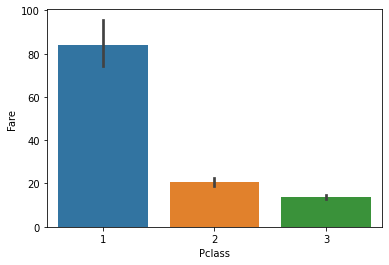

In [ ]:
sns.barplot(x='Pclass', y='Fare', data=df)#money talks here

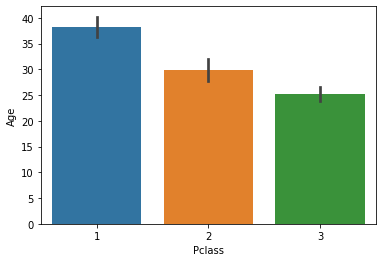

In [ ]:
sns.barplot(x='Pclass', y='Age', data=df)

For X data, notice that...

We drop Survived because is the target variable 

We drop Name because we have extracted the Title: Mr, Mrs, ...

We drop Ticket because it has no information -> see df.Ticket.nunique()

We drop Cabin because it has a lot of missings (77% are missings)

Then, we identify numerical variables and categorical variables,


In [27]:
df_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr


In [28]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AloneOrNot
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,Mr,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,C,Mrs,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Miss,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,S,Mrs,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,Officer,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,0,S,Miss,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,0,S,Miss,1


In [29]:
#Preprocessing (drop unnecessary parts)
x = df.drop(["Name","Ticket","Survived","SibSp","Parch"], 1)
y = df["Survived"]
x_test = df_test.drop(["Name", "Ticket","SibSp","Parch"],1)

In [30]:
x.isnull().sum()

Pclass          0
Sex             0
Age           177
Fare            0
Cabin           0
Embarked        2
Title           0
AloneOrNot      0
dtype: int64

In [25]:
cat_vars  = ['Sex', 'Embarked', 'Title']         # x.select_dtypes(include=[object]).columns.values.tolist()
num_vars  = ['Pclass', 'AloneOrNot', 'Cabin', 'Fare', 'Age'] # x.select_dtypes(exclude=[object]).columns.values.tolist()#Pclass needs to be treated as ordinal
# for fare it is needed to scale #for age im not sure frm bar plot we can understand there is some relationship btween age  however im not sure that i know the convenient approach
print("\nNumerical features:\n", num_vars)
print("\nCategorical features:\n", cat_vars)


Numerical features:
 ['Pclass', 'AloneOrNot', 'Cabin', 'Fare', 'Age']

Categorical features:
 ['Sex', 'Embarked', 'Title']


In [26]:
x_test

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,
892,3,male,34.5,7.8292,NaN,Q,Mr
893,3,female,47.0,7.0000,NaN,S,Mrs
894,2,male,62.0,9.6875,NaN,Q,Mr
895,3,male,27.0,8.6625,NaN,S,Mr
896,3,female,22.0,12.2875,NaN,S,Mrs
...,...,...,...,...,...,...,...
1305,3,male,NaN,8.0500,NaN,S,Mr
1306,1,female,39.0,108.9000,C105,C,NaN
1307,3,male,38.5,7.2500,NaN,S,Mr


In [42]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [43]:
#use label encoder or ordinal encoder for cabin which will goes like A-T(descending order) and nan values will take lets say -1 (couldnt make it happen atm)
#use KNNimputer for the Age and groupby lets say Pclass and sex then give the age make these two steps for one pipeline
#sibsb and parch should be merged and considers as a one column which will provide info is passenger alone or not
#Dont run this cell before make it above comments happen
oneh_preporcessin = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy="constant", fill_value='missing')),
    ('oh_enc', preprocessing.OneHotEncoder())
])
num_preprocessing = pipeline.Pipeline(steps=[
  ("imputer", IterativeImputer(max_iter=50, random_state=0)),

])
cat_preporcessing = pipeline.Pipeline(steps=[
  CategoricalImputer(variables=['grade'], imputation_method='frequent')
  # Some Encoder here. Remember to handle_unknown
])


NameError: ignored

In [ ]:
#pipe = make_pipeline(step1,step2,step3....)

In [36]:

cat_4_multModels = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='constant', fill_value='missing')),
    ('one hot', preprocessing.OneHotEncoder(
))
])


num_4_multmodels=pipeline.Pipeline(steps=[
    ("imputer",impute.KNNImputer(n_neighbors=5)),
    ("quantile transformer",preprocessing.QuantileTransformer(n_quantiles=100, random_state=0))
    ])

tree_prepro = compose.ColumnTransformer(transformers=[
    ("cat mult",cat_4_multModels,cat_vars),
    ("num mult",num_4_multmodels,num_vars)
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars

tree_prepro

ColumnTransformer(transformers=[('cat mult',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('one hot', OneHotEncoder())]),
                                 ['Sex', 'Embarked', 'Title']),
                                ('num mult',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('quantile transformer',
                                                  QuantileTransformer(n_quantiles=100,
                                                                      random_state=0))]),
                                 ['Pclass', 'AloneOrNot', 'Cabin', 'Fare',
                                  'Age'])])

In [44]:
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier

In [45]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [46]:
mult_classifiers={
    "SVM": svm.SVC(),
    "Logistic": LogisticRegression(),
    "KNN":KNeighborsClassifier(n_neighbors=3),
    "MLP":MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
    "RDF":RandomForestClassifier(random_state=42),
    "GBM": GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0),
    "LGBM":LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100),
    "CatBoost":CatBoostClassifier(),
    "XGBoost": XGBClassifier(),
    }

mult_classifiers = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in mult_classifiers.items()}

mult_classifiers["SVM"]

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat mult',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('one hot',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'Embarked', 'Title']),
                                                 ('num mult',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('quantile '
                                                                   'transformer',
                                                                   QuantileTransformer(n_quantiles=100,
                                                                                       random_state=0))]),
                                                  ['Pclass', 'AloneOrNot',
                                                   'Cabin', 'Fare', 'Age'])])),
                ('svc', SVC())])

In [ ]:

x_train, x_val, y_train, y_val = model_selection.train_test_split(x,y, test_size=0.2,stratify = y, random_state=4)



results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})

for model_name, model in mult_classifiers.items():
    start_time = time.time()
    
    # FOR EVERY PIPELINE (PREPRO + MODEL) -> TRAIN WITH TRAIN DATA (x_train)
    model.fit(x_train,y_train)
    # GET PREDICTIONS USING x_val
    pred = model.predict(x_val)

    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              
                              





results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

In [50]:
#will deal with that soon
'''rdf=RandomForestClassifier(random_state=42)
ada=AdaBoostClassifier(random_state=42)
log=LogisticRegression(random_state=42)
grb=GradientBoostingClassifier(random_state=42)
dct=DecisionTreeClassifier(random_state=42)
ext=ExtraTreesClassifier(random_state=42)
xgbc=XGBClassifier(random_state=42)

models=[rdf,ada,log,grb,dct,ext,xgbc]'''

models = {
    
    "ADA": AdaBoostClassifier(random_state=42),
    "LOG": LogisticRegression(),
    'EXT':ExtraTreesClassifier(random_state=42),
    "DCT":DecisionTreeClassifier(random_state=42),
    "MLP":MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
    "RDF":RandomForestClassifier(random_state=42),
    "GRB": GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0),
    "LGBM":LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100),
    "CatBoost":CatBoostClassifier(),
    "XGBoost": XGBClassifier(),
    
}

models = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in models.items()}

In [51]:
results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})

for model_name, model in models.items():
    start_time = time.time()
    
    # FOR EVERY PIPELINE (PREPRO + MODEL) -> TRAIN WITH TRAIN DATA (x_train)
    model.fit(x_train,y_train)
    # GET PREDICTIONS USING x_val
    pred = model.predict(x_val)

    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              
                              





results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Learning rate set to 0.008911
0:	learn: 0.6876511	total: 1.74ms	remaining: 1.74s
1:	learn: 0.6823959	total: 6.03ms	remaining: 3.01s
2:	learn: 0.6761925	total: 8.41ms	remaining: 2.8s
3:	learn: 0.6705937	total: 11.2ms	remaining: 2.78s
4:	learn: 0.6653944	total: 13.8ms	remaining: 2.75s
5:	learn: 0.6600055	total: 17.4ms	remaining: 2.88s
6:	learn: 0.6541981	total: 19.1ms	remaining: 2.71s
7:	learn: 0.6488533	total: 21.7ms	remaining: 2.69s
8:	learn: 0.6439356	total: 24.3ms	remaining: 2.67s
9:	learn: 0.6391750	total: 26.8ms	remaining: 2.65s
10:	learn: 0.6344856	total: 29.4ms	remaining: 2.65s
11:	learn: 0.6307238	total: 31.7ms	remaining: 2.61s
12:	learn: 0.6261066	total: 33.7ms	remaining: 2.56s
13:	learn: 0.6210083	total: 35ms	remaining: 2.46s
14:	learn: 0.6169249	total: 36ms	remaining: 2.36s
15:	learn: 0.6124576	total: 37.1ms	remaining: 2.28s
16:	learn: 0.6083679	total: 38.2ms	remaining: 2.21s
17:	learn: 0.6037194	total: 39.2ms	remaining: 2.14s
18:	learn: 0.5991658	total: 40.3ms	remaining: 2.0

,Model,Accuracy,Bal Acc.,Time
1,GRB,86.033520,85.665349,0.135863
2,XGBoost,86.033520,84.584980,0.124652
3,CatBoost,85.474860,83.590250,1.537468
4,RDF,84.916201,82.865613,0.307683
5,MLP,83.798883,80.606061,0.245071
6,ADA,83.240223,82.042161,0.187796
7,LGBM,83.240223,82.312253,0.109494
8,LOG,82.681564,81.317523,0.066334
9,EXT,82.122905,79.782609,0.260091
10,DCT,78.212291,76.600791,0.045967


In [55]:
import optuna
import sklearn
from sklearn import datasets
def objective(trial):

    skf = model_selection.StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

    tree_prepro.fit_transform(x)

    n_estimators = trial.suggest_int('n_estimators', 2, 20)

    max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))
    clf=pipeline.make_pipeline(tree_prepro, GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth))


    return sklearn.model_selection.cross_val_score(clf, x, y, cv=skf).mean()


In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

In [59]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
study.best_params

Accuracy: 0.8416978776529339


{'max_depth': 7.66557763307282, 'n_estimators': 12}

In [60]:
best_model = models["GRB"]

# Fit best model with all data

best_pipe=pipeline.make_pipeline(tree_prepro, GradientBoostingClassifier(n_estimators= 12, max_depth= 7.66557763307282))
best_pipe.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat mult',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('one hot',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'Embarked', 'Title']),
                                                 ('num mult',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('quantile '
                                                                   'transformer',
                                                                   QuantileTransformer(n_quantiles=100,
                                                                                       random_state=0))]),
                                                  ['Pclass', 'AloneOrNot',
                                                   'Cabin', 'Fare', 'Age'])])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=7.66557763307282,
                                            n_estimators=12))])

In [70]:
x_test = df_test.drop(["Name", "Ticket"],1)

In [72]:
x_test.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
Title         1
dtype: int64

In [73]:
x_test["AloneOrNot"] = (x_test["SibSp"] + x_test["Parch"]).apply(lambda x: 1 if x>0 else 0)
x_test["Cabin"] = x_test["Cabin"].apply(lambda x: 1 if x is True else 0)

In [74]:
x_test.Title=x_test.Title.fillna(x_test.Title.mode()[0])
x_test.Fare=x_test.Fare.fillna(x_test.Fare.mean())
x_test.Age = x_test.Age.fillna(x_test.Age.mean())

In [75]:
x_test.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      0
Title         0
AloneOrNot    0
dtype: int64

In [76]:
x_test = x_test.drop(["SibSp", "Parch"],1)

In [77]:
x_test

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,AloneOrNot
PassengerId,,,,,,,,
892,3,male,34.50000,7.8292,0,Q,Mr,0
893,3,female,47.00000,7.0000,0,S,Mrs,1
894,2,male,62.00000,9.6875,0,Q,Mr,0
895,3,male,27.00000,8.6625,0,S,Mr,0
896,3,female,22.00000,12.2875,0,S,Mrs,1
...,...,...,...,...,...,...,...,...
1305,3,male,30.27259,8.0500,0,S,Mr,0
1306,1,female,39.00000,108.9000,0,C,Mr,0
1307,3,male,38.50000,7.2500,0,S,Mr,0


In [78]:
test_pred = best_pipe.predict(x_test)

In [79]:
sub = pd.DataFrame(test_pred, index=x_test.index, columns=["Survived"])
sub.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [80]:
sub.to_csv("sub.csv")

In [81]:
!kaggle competitions submit -c titanic -f sub.csv -m "save the boy"

100% 2.77k/2.77k [00:01<00:00, 1.65kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster